In [17]:
import ROOT
from ROOT import larlite
from ROOT import TFile
import numpy as np
import matplotlib.pyplot as plt
import scipy.misc as smp
import root_numpy as rn
import pandas as pd
from scipy.optimize import curve_fit
import math
from root_numpy import root2array, root2rec, tree2array, array2root
%matplotlib inline

In [9]:
FILENAME = "ana_showercal1500.root" #TFile("ana.root","READ")

pi0_v = rn.root2array(FILENAME,
                    treename='pi0_tree',
                    branches=['true_pi0_e','true_angle','true_asym',\
                              'reco_pi0_e','event'])

gamma_v = rn.root2array(FILENAME,
                    treename='gamma_tree',
                    branches=['true_gamma_e','reco_gamma_e',\
                              'true_adj_gamma_e','reco_adj_gamma_e',\
                              'true_reco_dot','true_rad_l','reco_rad_l'])

gamma_v = rn.root2array(FILENAME,
                    treename='gamma_tree',
                    branches=['true_gamma_e','reco_gamma_e',\
                              'true_adj_gamma_e','reco_adj_gamma_e',\
                              'true_reco_dot','true_rad_l','reco_rad_l'])

true_e = [pi0_v[i][0] for i in xrange(pi0_v.shape[0])]
reco_e = [pi0_v[i][3] for i in xrange(pi0_v.shape[0])]

true_angle = [pi0_v[i][1] for i in xrange(pi0_v.shape[0]) if pi0_v[i][2]>-1]
true_asym = [pi0_v[i][2] for i in xrange(pi0_v.shape[0])  if pi0_v[i][2]>-1]

true_gamma_e = [gamma_v[i][0] for i in xrange(gamma_v.shape[0])]
reco_gamma_e = [gamma_v[i][1] for i in xrange(gamma_v.shape[0])]

true_adj_gamma_e = [gamma_v[i][2] for i in xrange(gamma_v.shape[0])]
reco_adj_gamma_e = [gamma_v[i][3] for i in xrange(gamma_v.shape[0])]

res = [ (reco_e[i] - true_e[i]) / true_e[i] for i in xrange(len(true_e))]
res_gamma = [ (reco_gamma_e[i] - true_gamma_e[i]) / true_gamma_e[i] for i in xrange(len(true_gamma_e))]
res_angle_gamma = [gamma_v[i][4] for i in xrange(gamma_v.shape[0])]


res_angle_gamma_deg = [ math.acos(res_angle_gamma[i])*180./math.pi for i in xrange(len(res_angle_gamma))]

#print res_angle_gamma_deg
print len(true_e)

235


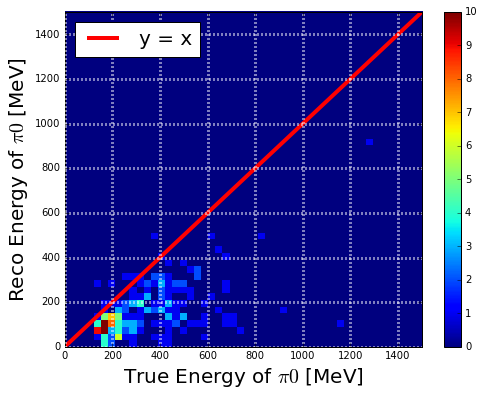

In [10]:
x = np.arange(0,3000,10)

plt.figure(figsize=(8,6))
plt.hist2d(true_e,reco_e,bins=50,\
           range=np.array([(0,1500), (0,1500)])) #, norm=LogNorm())
plt.plot(x,x,'r-',label='y = x',lw=4)
plt.grid(True,color='w',lw=3)
plt.xlabel("True Energy of $\pi0$ [MeV]",fontsize=20)
plt.ylabel("Reco Energy of $\pi0$ [MeV]",fontsize=20)
plt.legend(loc=2,fontsize=20)
plt.colorbar()
plt.savefig("Plots/RecoMCEnergyCompare.png")
plt.show()

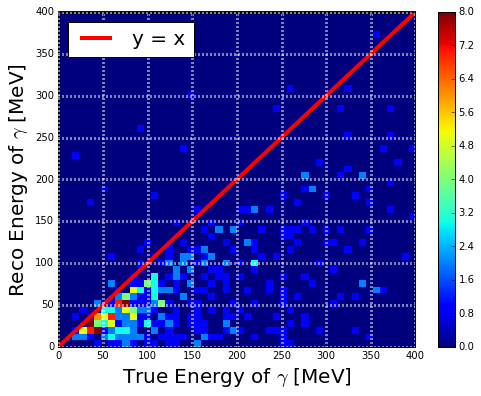

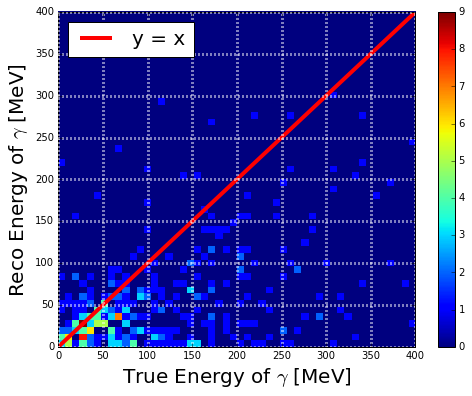

In [13]:
x = np.arange(0,800,10)

plt.figure(figsize=(8,6))
plt.hist2d(true_gamma_e,reco_gamma_e,bins=50,\
           range=np.array([(0,400), (0,400)])) #, norm=LogNorm())
plt.plot(x,x,'r-',label='y = x',lw=4)
plt.grid(True,color='w',lw=3)
plt.xlabel("True Energy of $\gamma$ [MeV]",fontsize=20)
plt.ylabel("Reco Energy of $\gamma$ [MeV]",fontsize=20)
plt.legend(loc=2,fontsize=20)
plt.colorbar()
plt.savefig("Plots/RecoMCEnergyCompare.png")
plt.show()

plt.figure(figsize=(8,6))
plt.hist2d(true_adj_gamma_e,reco_adj_gamma_e,bins=50,\
           range=np.array([(0,400), (0,400)])) #, norm=LogNorm())
plt.plot(x,x,'r-',label='y = x',lw=4)
plt.grid(True,color='w',lw=3)
plt.xlabel("True Energy of $\gamma$ [MeV]",fontsize=20)
plt.ylabel("Reco Energy of $\gamma$ [MeV]",fontsize=20)
plt.legend(loc=2,fontsize=20)
plt.colorbar()
plt.savefig("Plots/RecoMCEnergyCompare.png")
plt.show()

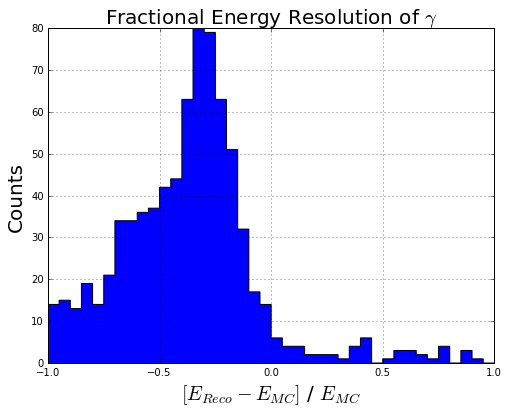

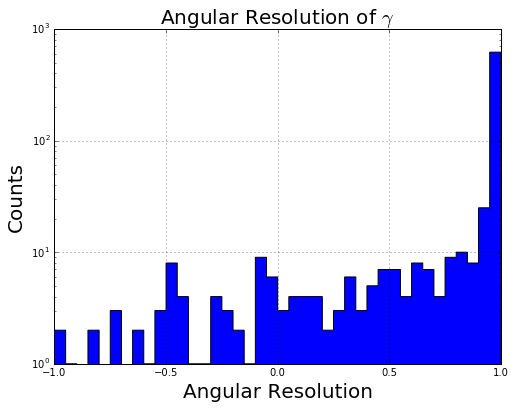

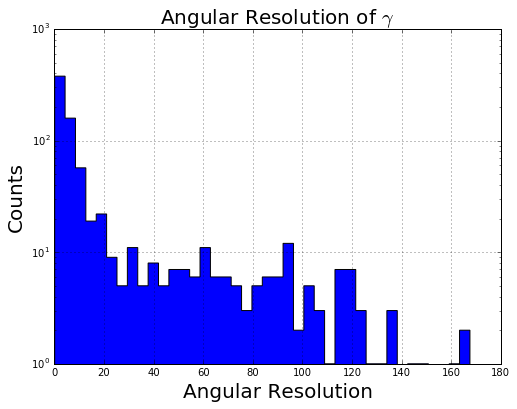

In [4]:
plt.figure(figsize=(8,6))
plt.hist(res_gamma,bins=40,range=(-1.,1.),histtype='step',fill='b',edgecolor='k')#,alpha=0.4)
plt.xlabel("$[E_{Reco} - E_{MC}]$ / $E_{MC}$",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.title("Fractional Energy Resolution of $\gamma$",fontsize=20)
plt.grid(True)
plt.savefig("Plots/Sample_GammaERes.png")

plt.figure(figsize=(8,6))
plt.hist(res_angle_gamma,bins=40,range=(-1.,1.),histtype='step',fill='b',edgecolor='k')#,alpha=0.4)
plt.xlabel("Angular Resolution",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.title("Angular Resolution of $\gamma$",fontsize=20)
plt.grid(True)
plt.yscale('log')
plt.savefig("Plots/Sample_GammaAngleRes.png")

plt.figure(figsize=(8,6))
plt.hist(res_angle_gamma_deg,bins=40,histtype='step',fill='b',edgecolor='k')#,alpha=0.4)
plt.xlabel("Angular Resolution",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.title("Angular Resolution of $\gamma$",fontsize=20)
plt.grid(True)
plt.yscale('log')
plt.savefig("Plots/Sample_GammaAngleResDeg.png")

In [5]:
# plt.figure(figsize=(10,8))
# plt.plot(true_e,res,'bo')
# plt.grid(True)
# plt.xlim(0,1000)
# plt.ylim(-1.5,3) #1200)
# plt.xlabel("True Energy of $\pi0$ [MeV]",fontsize=20)
# plt.ylabel("Fractional Energy Resolution",fontsize=20)
# plt.legend(loc=2,fontsize=20)
# plt.savefig("Plots/FirstPassERes.png")
# #plt.show()

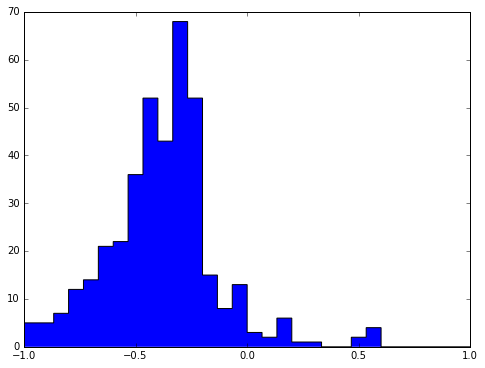

In [6]:
plt.figure(figsize=(8,6))
n_counts, bin_edges, _ = plt.hist(res,bins=30,range=(-1.,1.),histtype='step',fill='b',edgecolor='k')
bins = (bin_edges[:-1] + bin_edges[1:])/2

In [7]:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

# Calculate Gaussian distribution
coeff, _ = curve_fit(gauss, bins, n_counts, p0=([45.,0,0.5]))
print coeff

[ 55.52780616  -0.36258616   0.17009304]


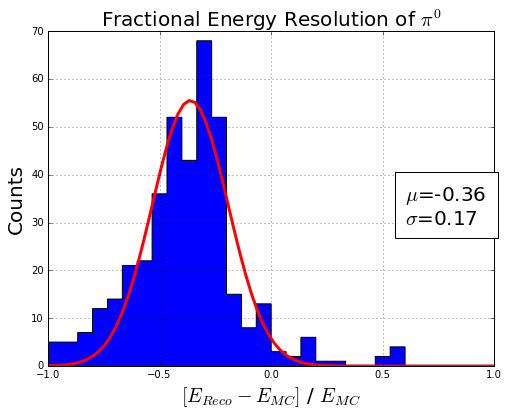

In [8]:
x_g = np.linspace(-1.,1.,80)

plt.figure(figsize=(8,6))
n_counts, bin_edges, _ = plt.hist(res,bins=30,range=(-1.0,1.),histtype='step',fill='b',edgecolor='k')
plt.plot(x_g, gauss(x_g,*coeff), 'r-',label='Gaussian Fit',lw=3)
plt.text(0.6, 30, '$\mu$=%.2f \n$\sigma$=%.2f' % \
                (coeff[1], coeff[2]),fontsize=20,bbox={'facecolor':'white','pad':10})
plt.title("Fractional Energy Resolution of $\pi^0$",fontsize=20)
plt.xlabel("$[E_{Reco} - E_{MC}]$ / $E_{MC}$",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.grid(True)
plt.savefig("Plots/EnergyResolution.png")

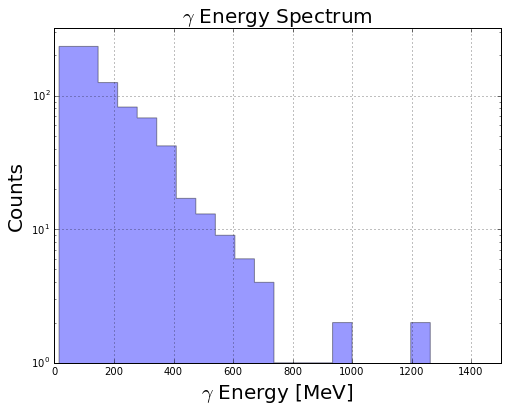

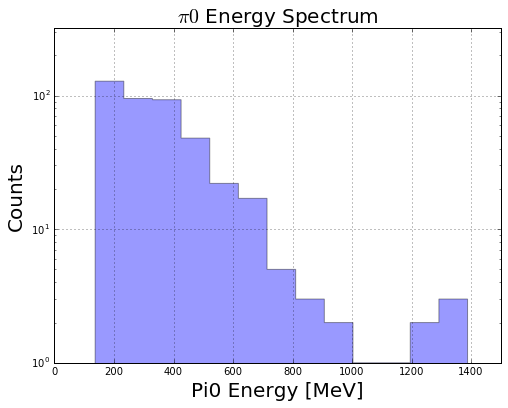

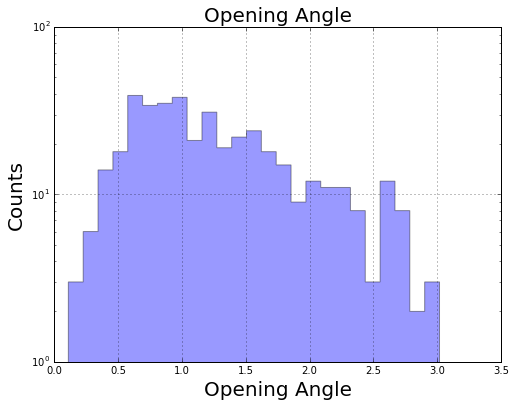

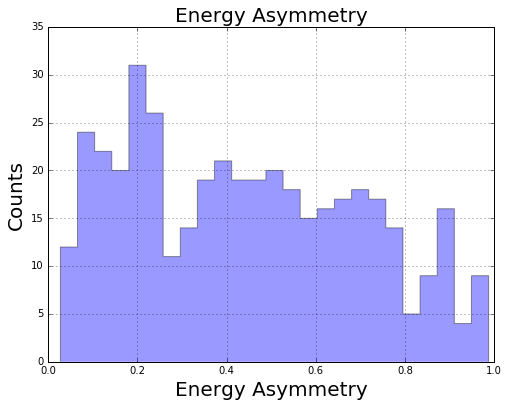

In [45]:
bins = 25

plt.figure(figsize=(8,6))
plt.hist(gamma_e,bins,histtype='step',fill='b',edgecolor='k',alpha=0.4)
plt.grid(True)
plt.xlabel("$\gamma$ Energy [MeV]",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.title("$\gamma$ Energy Spectrum",fontsize=20)
plt.yscale('log')
plt.ylim(0,320)
plt.xlim(0,1500)
plt.savefig("Plots/Sample_GammaE.png")


plt.figure(figsize=(8,6))
plt.hist(true_e,bins,histtype='step',fill='b',edgecolor='k',alpha=0.4)
plt.grid(True)
plt.xlabel("Pi0 Energy [MeV]",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.title("$\pi0$ Energy Spectrum",fontsize=20)
plt.yscale('log')
plt.ylim(0,320)
plt.xlim(0,1500)
plt.savefig("Plots/Sample_pi0E.png")


plt.figure(figsize=(8,6))
plt.hist(true_angle,bins,histtype='step',fill='b',edgecolor='k',alpha=0.4)
plt.grid(True)
plt.title("Opening Angle",fontsize=20)
plt.xlabel("Opening Angle",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.yscale('log')
plt.savefig("Plots/Sample_OpenAngle.png")


plt.figure(figsize=(8,6))
plt.hist(true_asym,bins,histtype='step',fill='b',edgecolor='k',alpha=0.4)
plt.grid(True)
plt.title("Energy Asymmetry",fontsize=20)
plt.xlabel("Energy Asymmetry",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.savefig("Plots/Sample_EAsym.png")
#plt.yscale('log')

[ 307.  180.   66.   38.   20.   23.   15.   10.   11.   13.    4.    7.
    4.    3.    3.    5.   10.   10.    6.    7.    5.    4.    5.    5.
    4.    4.    3.    4.   10.    0.    4.    6.    3.    4.    8.    7.
    3.    3.    3.    2.    1.    2.    1.    2.    2.    3.    3.    0.
    0.    1.]
Sample :  0.655213270142


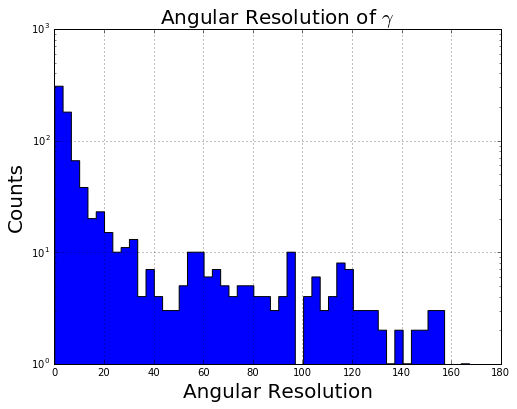

In [15]:

plt.figure(figsize=(8,6))
ncounts, bins,_ = plt.hist(res_angle_gamma_deg,bins=50,histtype='step',fill='b',edgecolor='k')#,alpha=0.4)
print ncounts
print "Sample : ", (np.cumsum(ncounts[:3]))[-1]/(np.cumsum(ncounts)[-1])
#print res_angle_gamma_deg



plt.xlabel("Angular Resolution",fontsize=20)
plt.ylabel("Counts",fontsize=20)
plt.title("Angular Resolution of $\gamma$",fontsize=20)
plt.grid(True)
plt.yscale('log')
plt.savefig("Plots/Sample_GammaAngleResDeg.png")
